/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


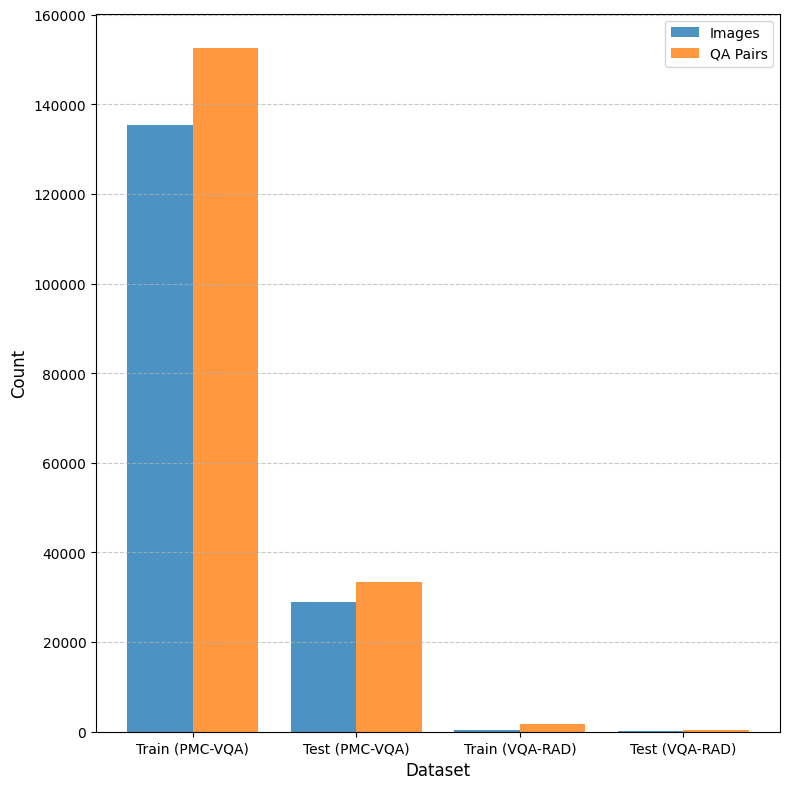

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


test_df_path = 'test_2.csv'
train_df_path = 'train_2.csv'

test_df = pd.read_csv(test_df_path)
train_df = pd.read_csv(train_df_path)

train_image_count = train_df['Figure_path'].nunique()
test_image_count = test_df['Figure_path'].nunique()

train_qa_count = train_df.shape[0]
test_qa_count = test_df.shape[0]


summary_data = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'Image Count': [train_image_count, test_image_count],
    'QA Count': [train_qa_count, test_qa_count]
})

VQA = pd.read_excel('VQA_RAD Dataset Public (1).xlsx')
train_subset = VQA[VQA['QID_para'].isin(['freeform', 'para'])]
test_subset = VQA[VQA['QID_para'].isin(['test_freeform', 'test_para'])]


train_additional_image_count = train_subset['IMAGEID'].nunique()
train_additional_qa_count = train_subset.shape[0]

test_additional_image_count = test_subset['IMAGEID'].nunique()
test_additional_qa_count = test_subset.shape[0]

categories = ['Train (PMC-VQA)', 'Test (PMC-VQA)', 'Train (VQA-RAD)', 'Test (VQA-RAD)']
image_counts = [
    train_image_count,
    test_image_count,
    train_additional_image_count,
    test_additional_image_count,
]
qa_counts = [
    train_qa_count,
    test_qa_count,
    train_additional_qa_count,
    test_additional_qa_count]
    

bar_width = 0.4
x_indexes = range(len(categories))


plt.figure(figsize=(8, 8))


plt.bar([x - bar_width / 2 for x in x_indexes], image_counts, width=bar_width, label='Images', alpha=0.8)


plt.bar([x + bar_width / 2 for x in x_indexes], qa_counts, width=bar_width, label='QA Pairs', alpha=0.8)


plt.ylabel('Count', fontsize=12)
plt.xlabel('Dataset', fontsize=12)
plt.xticks(ticks=x_indexes, labels=categories)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

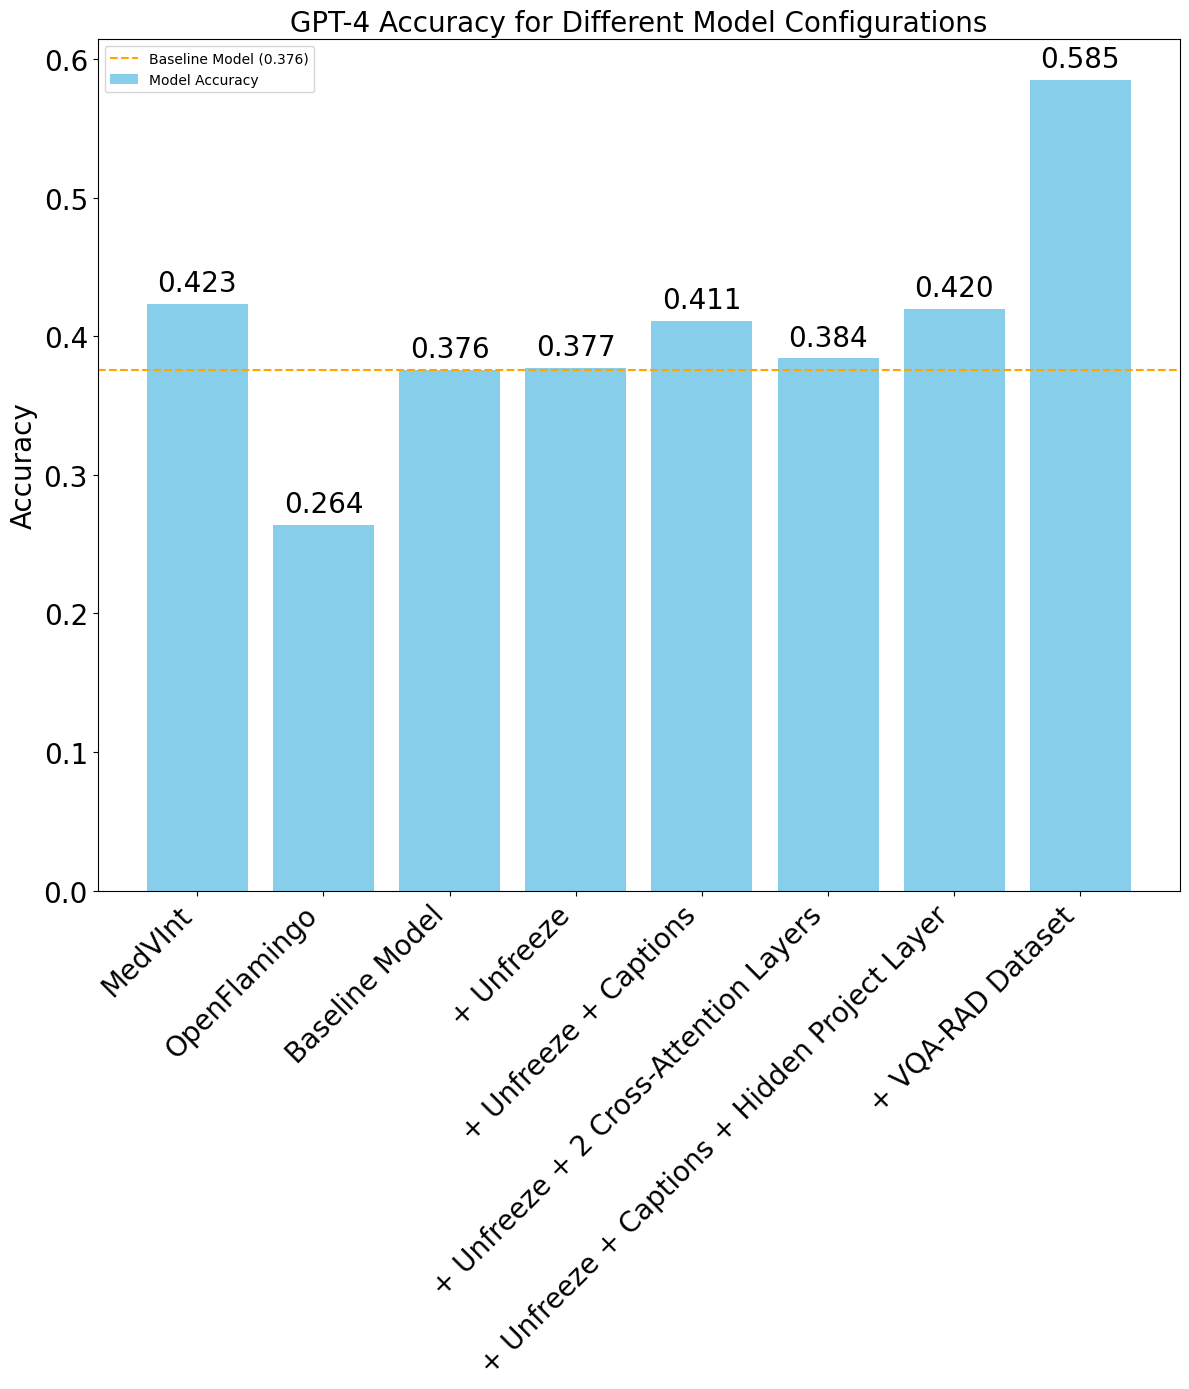

In [ ]:
models_new = [
    "MedVInt",
    "OpenFlamingo",
    "Baseline Model",
    "+ Unfreeze",
    "+ Unfreeze + Captions",
    "+ Unfreeze + 2 Cross-Attention Layers",
    "+ Unfreeze + Captions + Hidden Project Layer",
    "+ VQA-RAD Dataset"
]
accuracy_new = [0.423, 0.264, 0.376, 0.377, 0.411, 0.384, 0.420, 0.585]

baseline_new = 0.376 

plt.figure(figsize=(12, 14))
bars_new = plt.bar(models_new, accuracy_new, color='skyblue', label="Model Accuracy")


plt.axhline(y=baseline_new, color='orange', linestyle='--', label=f"Baseline Model ({baseline_new})")


for bar, acc in zip(bars_new, accuracy_new):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{acc:.3f}",
             ha='center', va='bottom', fontsize=20)


plt.title("GPT-4 Accuracy for Different Model Configurations", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.tight_layout()

# Display the chart
plt.show()